<a href="https://colab.research.google.com/github/vishv96/Tensorflow_Tutz/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flattening**: The process of converting a 2d image into 1d vector

**ReLU**: An activation function that allows a model to solve nonlinear problems

**Softmax**: A function that provides probabilities for each possible output class

**Classification**: A machine learning model used for distinguishing among two or more output categories

# **Classify images of cloths**

Install and import dependencies

In [ ]:
!pip install -U tensorflow_datasets

In [12]:
import tensorflow as tf


In [13]:
# import tensorflow dataset
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [14]:
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# **Import Fashion MNIST dataset**

Dataset contains of 70000 images of (28X28)

Loading dataset

In [16]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [17]:
class_names = metadata.features['label'].names
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


 Checking number of traning and test data

In [18]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


# Preprocess data

The value of each pixel in image data is an integer b/w `[0,255]`. For the model to work properly, normalized to the range `[0,1]`

In [19]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [21]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# cache images in memory
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

**Exploring processed data**

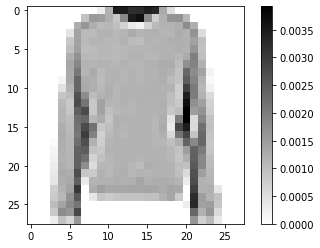

In [26]:
for image, label in train_dataset.take(1):
  break
image = image.numpy().reshape(28,28)

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid = False
plt.show()

Display first 25 images

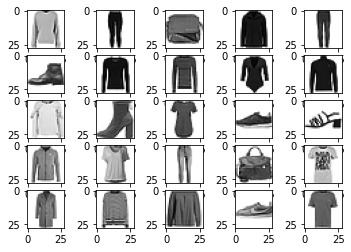

In [31]:
for i,(image,label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape(28,28)
  plt.subplot(5,5,i+1)
  plt.xticks = []
  plt.yticks = []
  plt.grid = False
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel = class_names[label]
plt.show()

